In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('toy_dataset.csv')

In [3]:
data.head()


,Number,City,Gender,Age,Income,Illness
0,1,Dallas,Male,41,40367.0,No
1,2,Dallas,Male,54,45084.0,No
2,3,Dallas,Male,42,52483.0,No
3,4,Dallas,Male,40,40941.0,No
4,5,Dallas,Male,46,50289.0,No


In [4]:
data.shape

(150000, 6)

In [5]:
data.info

<bound method DataFrame.info of         Number    City  Gender  Age    Income Illness
0            1  Dallas    Male   41   40367.0      No
1            2  Dallas    Male   54   45084.0      No
2            3  Dallas    Male   42   52483.0      No
3            4  Dallas    Male   40   40941.0      No
4            5  Dallas    Male   46   50289.0      No
5            6  Dallas  Female   36   50786.0      No
6            7  Dallas  Female   32   33155.0      No
7            8  Dallas    Male   39   30914.0      No
8            9  Dallas    Male   51   68667.0      No
9           10  Dallas  Female   30   50082.0      No
10          11  Dallas  Female   48   41524.0     Yes
11          12  Dallas    Male   47   54777.0      No
12          13  Dallas    Male   46   62749.0      No
13          14  Dallas  Female   42   50894.0      No
14          15  Dallas  Female   61   38429.0      No
15          16  Dallas    Male   43   34074.0      No
16          17  Dallas    Male   27   50398.0     

In [6]:
data.isnull().sum()

Number     0
City       0
Gender     0
Age        0
Income     0
Illness    0
dtype: int64

In [7]:
data.duplicated().sum()

0

In [8]:
data.describe()

,Number,Age,Income
count,150000.000000,150000.000000,150000.000000
mean,75000.500000,44.950200,91252.798273
std,43301.414527,11.572486,24989.500948
min,1.000000,25.000000,-654.000000
25%,37500.750000,35.000000,80867.750000
50%,75000.500000,45.000000,93655.000000
75%,112500.250000,55.000000,104519.000000
max,150000.000000,65.000000,177157.000000


Analysis of various factors that affect income.

There are no null and duplicate value

Check the data present in the form of categorical columns

In [20]:
data.City.value_counts()

New York City      50307
Los Angeles        32173
Dallas             19706
Mountain View      14219
Austin             12292
Boston              8301
Washington D.C.     8120
San Diego           4881
Name: City, dtype: int64

In [21]:
data.Gender.value_counts()

Male      83800
Female    66199
Name: Gender, dtype: int64

In [22]:
data.Illness.value_counts()

No     137861
Yes     12138
Name: Illness, dtype: int64

Univariate Analysis

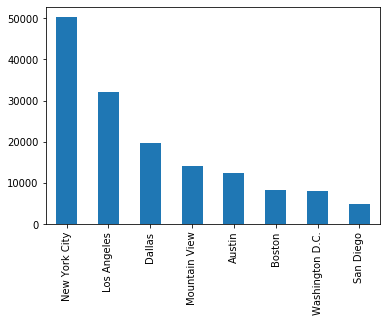

In [24]:
data.City.value_counts().plot.bar()
plt.show()

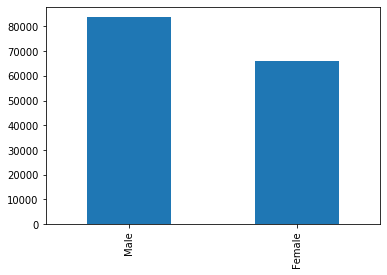

In [25]:
data.Gender.value_counts().plot.bar()
plt.show()

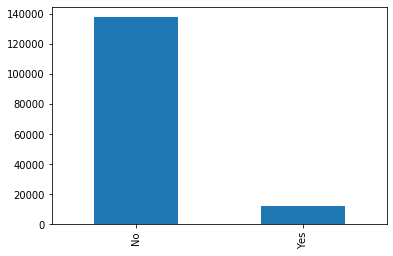

In [26]:
data.Illness.value_counts().plot.bar()
plt.show()

# Visualizing the distribution of numercial columns

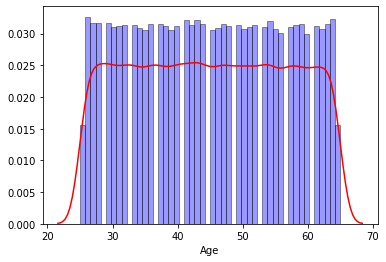

In [37]:
sns.distplot(data.Age,hist_kws=dict(edgecolor="k", linewidth=1,color='blue'),color='red')
plt.show()

# Age is group equally distributed in dataset which is said to be it forms rectangular distribution.

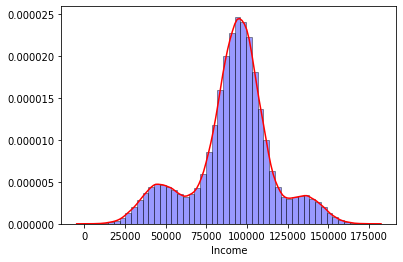

In [41]:
sns.distplot(data.Income,hist_kws=dict(edgecolor='K', linewidth=1, color='blue'), color = 'red')
plt.show()

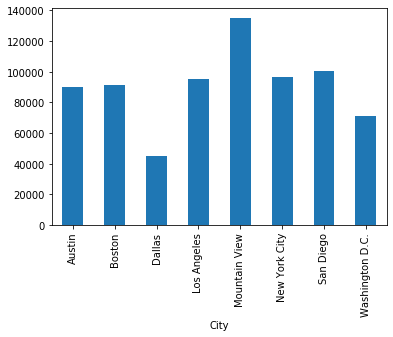

In [42]:
data.groupby(['City']).mean().Income.plot.bar()
plt.show()

# Average income is maximum for Mountain View.

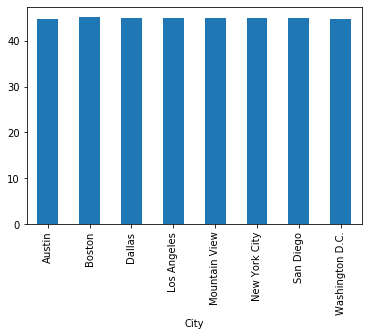

In [43]:
data.groupby(['City']).mean().Age.plot.bar()
plt.show()


# Average age is similar for all cities

In [45]:
data['Patient'] = data.Illness.apply(lambda x : 1 if x == 'Yes' else 0)
data.Patient.value_counts()

0    137861
1     12138
Name: Patient, dtype: int64

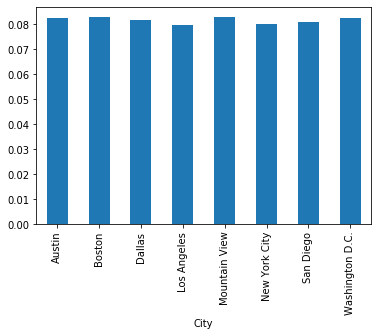

In [46]:
data.groupby(['City']).mean().Patient.plot.bar()
plt.show()

# Average health for all the cities is nearly same


# To observe correlation between two numerical column using scatter graph

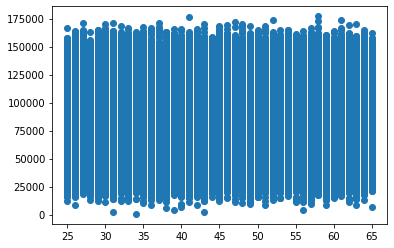

In [47]:
plt.scatter(x=data.Age, y=data.Income)
plt.show()

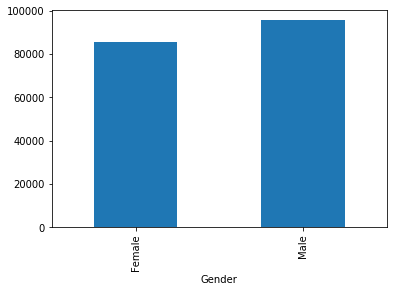

In [48]:
data.groupby(['Gender']).mean().Income.plot.bar()
plt.show()

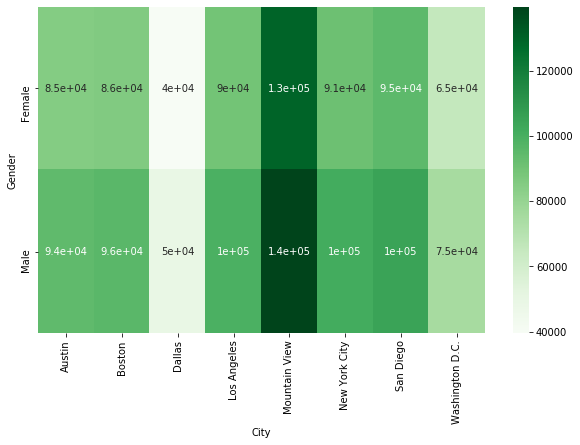

In [54]:
pvt_tbl = pd.pivot_table(data = data,index = 'Gender',columns = 'City', values = 'Income', aggfunc = np.mean)
plt.figure(figsize = [10,6])
sns.heatmap(pvt_tbl,cmap = 'Greens',annot = True)
plt.show()

# Normalized values for heatmap

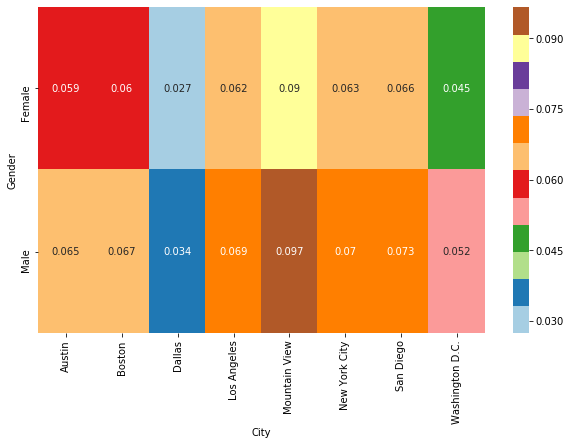

In [56]:
crs_tb = pd.crosstab(data.Gender, data.City, values = data.Income, aggfunc = np.mean, normalize = True)
plt.figure(figsize = [10,6])
sns.heatmap(crs_tb, cmap = 'Paired' ,annot = True)
plt.show()